# Heart Attack Analysis & Prediction

## Install Required Libs ( If not installed already) 

In [ ]:
#!pip install pandas
#!pip install NumPy

In [ ]:
#!pip install matplotlib
#!pip install seaborn

In [ ]:
#!pip install sklearn

In [ ]:
#!pip install xgboost

In [ ]:
#!pip install yellowbrick

## Import Required Lib

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report,roc_curve,RocCurveDisplay
from sklearn.metrics import recall_score, accuracy_score,roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier

In [2]:
# Apply the default theme
sns.set_theme()
sns.set_style("whitegrid")

In [3]:
# Plot should appear inside the jupyter notebook
%matplotlib inline

In [4]:
plt.rcParams["figure.figsize"] = (10,6)
plt.rcParams['figure.dpi'] = 100

In [5]:
pd.options.display.max_rows = 10
pd.options.display.max_columns = 40

In [6]:
import warnings
warnings.filterwarnings("ignore")

## Importing Data for analysis

In [7]:
ds_heart = pd.read_csv("Data/heart.csv")

In [8]:
#Printing Dataset Shape
print("\nDateset Shape is : ",ds_heart.shape)


Dateset Shape is :  (303, 14)


### Let's Understand Our Data

In [9]:
ds_heart.sample()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0


In [10]:
ds_heart.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
#Columns List
ds_heart.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [12]:
#List of Numeric Columns
numeric_columns = [column for column in ds_heart.columns if (ds_heart[column].dtype == 'float64' or ds_heart[column].dtype == 'int64')]
print(numeric_columns)

['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output']


In [13]:
#Duplicate Values 
ds_heart.duplicated().sum()

1

### Data Cleaning and Manupulation using Function & RegEx


In [14]:
#Removing duplicate value 
ds_heart.drop_duplicates(inplace=True)

In [15]:
#Total Records 303 unique records 302
#Printing Dataset Shape
print("\nDateset Shape is : ",ds_heart.shape,"(Unqiue Records)\n")


Dateset Shape is :  (302, 14) (Unqiue Records)



In [16]:
ds_heart.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [17]:
## Rename few columns to understand 
ds_heart.rename(columns={'output': 'attack', 
                         'thall': 'stresstest',
                         'caa':'numberofmajorvessels',
                         'cp':'chestpaintype',
                         'exng':'exerciseinducedangina',
                         'restecg':'restingecg',
                         'fbs':'fastingbloodsugar',
                         'trtbps':'restingbloodpressure',
                         'thalachh':'maxheartrateachieved',
                         'slp':'slope',
                         'chol':'cholestoral'}, inplace=True) 
ds_heart.columns

Index(['age', 'sex', 'chestpaintype', 'restingbloodpressure', 'cholestoral',
       'fastingbloodsugar', 'restingecg', 'maxheartrateachieved',
       'exerciseinducedangina', 'oldpeak', 'slope', 'numberofmajorvessels',
       'stresstest', 'attack'],
      dtype='object')

In [18]:
#finding Missing Values 
pd.options.display.max_rows = 15
print(ds_heart.isnull().sum())
pd.options.display.max_rows = 5

age                      0
sex                      0
chestpaintype            0
restingbloodpressure     0
cholestoral              0
fastingbloodsugar        0
restingecg               0
maxheartrateachieved     0
exerciseinducedangina    0
oldpeak                  0
slope                    0
numberofmajorvessels     0
stresstest               0
attack                   0
dtype: int64


In [19]:
#chest pain type: chest pain type
# 0: typical angina
# 1: atypical angina
# 2: non-anginal pain
# 3: asymptomatic
#Validating Values  
ds_heart.groupby(['chestpaintype'])['chestpaintype'].count()

chestpaintype
0    143
1     50
2     86
3     23
Name: chestpaintype, dtype: int64

In [20]:
#fasting blood sugar > 120 mg/dl
#1 = true;
#0 = false
#Validating Values
ds_heart.groupby(['fastingbloodsugar'])['fastingbloodsugar'].count()

fastingbloodsugar
0    257
1     45
Name: fastingbloodsugar, dtype: int64

In [21]:
# Heart Attack Count out of 303
#0 = No Hard Attack
#1 = Had Heart Attack 
#Validating Values
ds_heart.groupby(['attack'])['attack'].count()
# 164 Had Heart Attack out of 303

attack
0    138
1    164
Name: attack, dtype: int64

In [22]:
#Thalium Stress Test result ~ (0,3) 
# 0 : Normal blood flow
# 1 : Abnormal blood flow during exercise - coronary artery disease
# 2 : Low blood flow during both rest and exercise -  severe blockage
# 3 : No thallium visible in parts of the heart - sign of damage from a heart attack
ds_heart.groupby(['stresstest'])['stresstest'].count()

stresstest
0      2
1     18
2    165
3    117
Name: stresstest, dtype: int64

In [23]:
# Number of major vessels 
# Valid Values 0,1,2,3
ds_heart.groupby(['numberofmajorvessels'])['numberofmajorvessels'].count()

numberofmajorvessels
0    175
1     65
2     38
3     20
4      4
Name: numberofmajorvessels, dtype: int64

In [24]:
# Found 4 Invalid record for Number of major vessels 
# Either Defaulting with meanvalue , max values or 
# Removing record with Invalid Values 
# To demostrate the concept of filling Missing Value we will use option 1 

In [25]:
#Code to remove Invalid values (Not used)
#ds_heart=ds_heart[ds_heart.numberofmajorvessels!=4]

In [26]:
ds_heart['numberofmajorvessels'] = ds_heart['numberofmajorvessels'].replace(4,np.nan)

In [27]:
np.unique(ds_heart['numberofmajorvessels'])

array([ 0.,  1.,  2.,  3., nan])

In [28]:
ds_heart['numberofmajorvessels'] = ds_heart['numberofmajorvessels'].fillna(ds_heart['numberofmajorvessels'].max())

In [29]:
ds_heart = ds_heart.astype({'numberofmajorvessels':'int64'})
ds_heart.groupby(['numberofmajorvessels'])['numberofmajorvessels'].count()

numberofmajorvessels
0    175
1     65
2     38
3     24
Name: numberofmajorvessels, dtype: int64

In [30]:
ds_heart.shape

(302, 14)

In [31]:
#Exercise induced angina 
# 1 = Yes, 
# 0 = No,
# Validating
ds_heart.groupby(['exerciseinducedangina'])['exerciseinducedangina'].count()

exerciseinducedangina
0    203
1     99
Name: exerciseinducedangina, dtype: int64

In [32]:
#Resting electrocardiographic results 
# 0 = Normal
# 1 = ST-T wave normality
# 2 = Left ventricular hypertrophy
# Validating
ds_heart.groupby(['restingecg'])['restingecg'].count()

restingecg
0    147
1    151
2      4
Name: restingecg, dtype: int64

In [33]:
#Max Heart Rate Achieved
#ds_heart.groupby(['maxheartrateachieved'])['maxheartrateachieved'].count()
np.unique(ds_heart['maxheartrateachieved'])

array([ 71,  88,  90,  95,  96,  97,  99, 103, 105, 106, 108, 109, 111,
       112, 113, 114, 115, 116, 117, 118, 120, 121, 122, 123, 124, 125,
       126, 127, 128, 129, 130, 131, 132, 133, 134, 136, 137, 138, 139,
       140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
       153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165,
       166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 177, 178, 179,
       180, 181, 182, 184, 185, 186, 187, 188, 190, 192, 194, 195, 202],
      dtype=int64)

In [34]:
#Resting Blood Pressure 
# 0 : downsloping
# 1 : flat
# 2 : upsloping
ds_heart.groupby(['slope'])['slope'].count()

slope
0     21
1    140
2    141
Name: slope, dtype: int64

In [35]:
#cholestoral < 200 means healthy individual
#ds_heart.groupby(['cholestoral'])['cholestoral'].count()
np.unique(ds_heart['cholestoral'])

array([126, 131, 141, 149, 157, 160, 164, 166, 167, 168, 169, 172, 174,
       175, 176, 177, 178, 180, 182, 183, 184, 185, 186, 187, 188, 192,
       193, 195, 196, 197, 198, 199, 200, 201, 203, 204, 205, 206, 207,
       208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220,
       221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233,
       234, 235, 236, 237, 239, 240, 241, 242, 243, 244, 245, 246, 247,
       248, 249, 250, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261,
       262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 273, 274, 275,
       276, 277, 278, 281, 282, 283, 284, 286, 288, 289, 290, 293, 294,
       295, 298, 299, 300, 302, 303, 304, 305, 306, 307, 308, 309, 311,
       313, 315, 318, 319, 321, 322, 325, 326, 327, 330, 335, 340, 341,
       342, 353, 354, 360, 394, 407, 409, 417, 564], dtype=int64)

## Generating insights

In [36]:
ds_attack = ds_heart[ds_heart.attack==1]

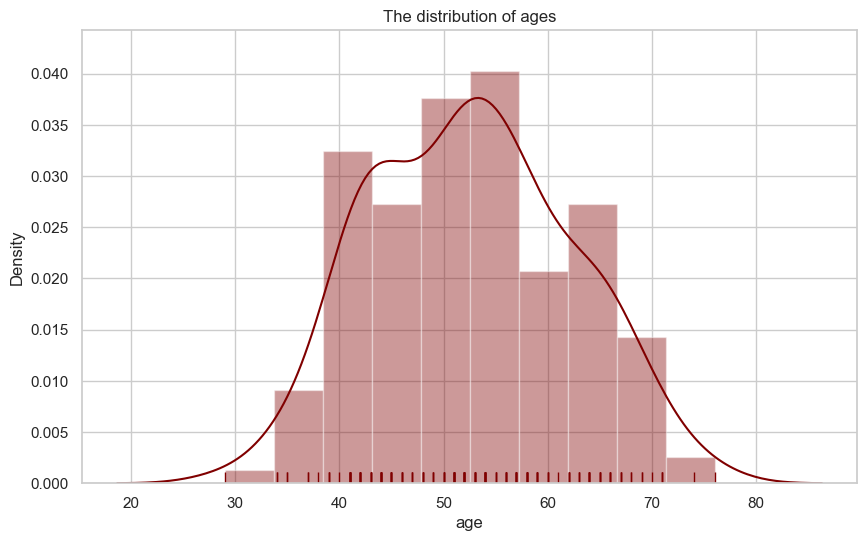

In [37]:
ax= sns.distplot(ds_attack.age, rug=True, color="maroon")
plt.title("The distribution of ages")
plt.show()

## Age V/s Probability of Heart Attack

In [38]:
def graphanalysis(x,y,z):
    fig1 = plt.figure()
    ax1 = fig1.add_subplot(1, 1, 1)
    plt.title(x)
    sns.kdeplot(data=ds_heart[ds_heart.attack==1], x=y, hue = z, shade=True, palette="crest", ax=ax1, alpha=.3)
    sns.kdeplot(data=ds_heart[ds_heart.attack==0], x=y, shade=True, ax=ax1, palette="crest",alpha=0.3)
    plt.show()

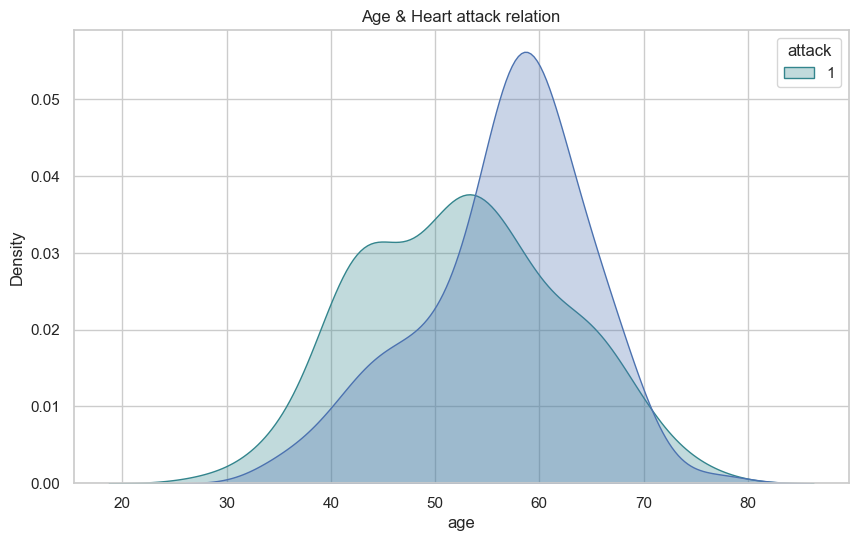

In [39]:
graphanalysis("Age & Heart attack relation","age","attack")

## Gender V/s Probability of Heart Attack

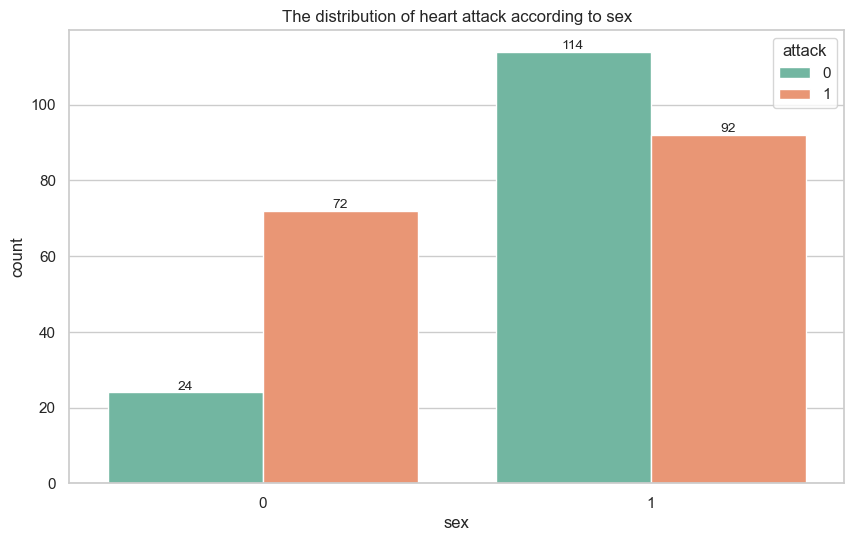

In [40]:
ax= sns.countplot(ds_heart.sex, hue=ds_heart.attack, palette="Set2")
plt.title("The distribution of heart attack according to sex")
for p in ax.containers:
    ax.bar_label(p)

In [41]:
# the average heart attack risk percentage according to sex
# 1 --> male
# 0 --> female
ds_heart.groupby('sex').attack.apply(lambda x: x.sum()/x.size * 100)

sex
0    75.000000
1    44.660194
Name: attack, dtype: float64

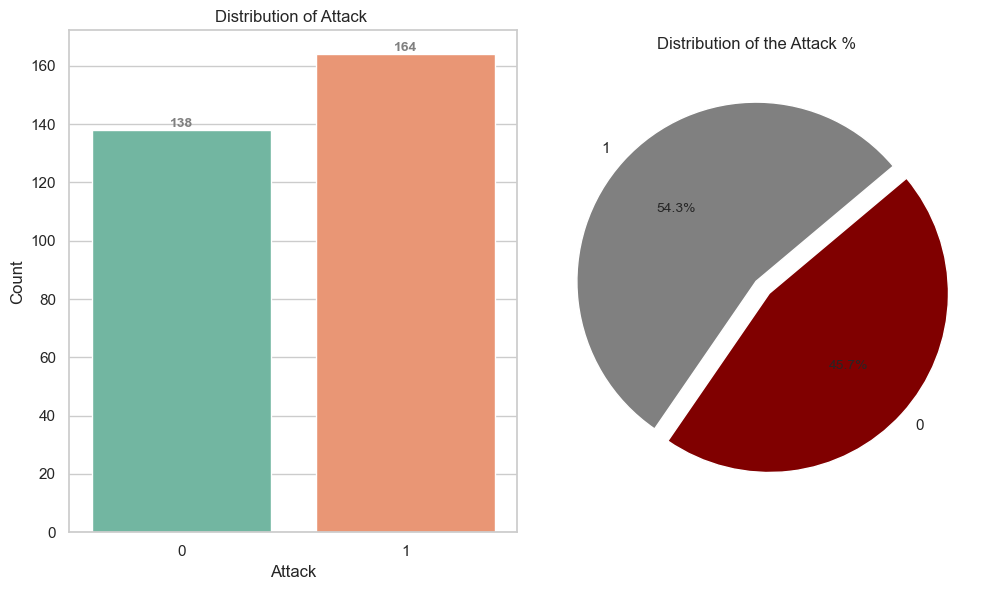

In [42]:
plt.subplot(1,2,1)
ax = sns.countplot(x='attack', data=ds_heart, palette="Set2")
plt.title('Distribution of Attack ')
plt.xlabel('Attack')
plt.ylabel('Count')
ax.bar_label(ax.containers[0], fontsize=10, color='grey', fontweight='bold')
plt.subplot(1,2,2)
plt.pie(ds_heart.attack.value_counts(), labels = ds_heart.attack.value_counts().index, autopct = '%1.1f%%', startangle = 40, explode = (0, 0.1), colors = ['grey', 'maroon'] )
plt.title('Distribution of the Attack %')
plt.tight_layout()
plt.show()

## Max Heart Rate Achieved V/s Probability of Heart Attack

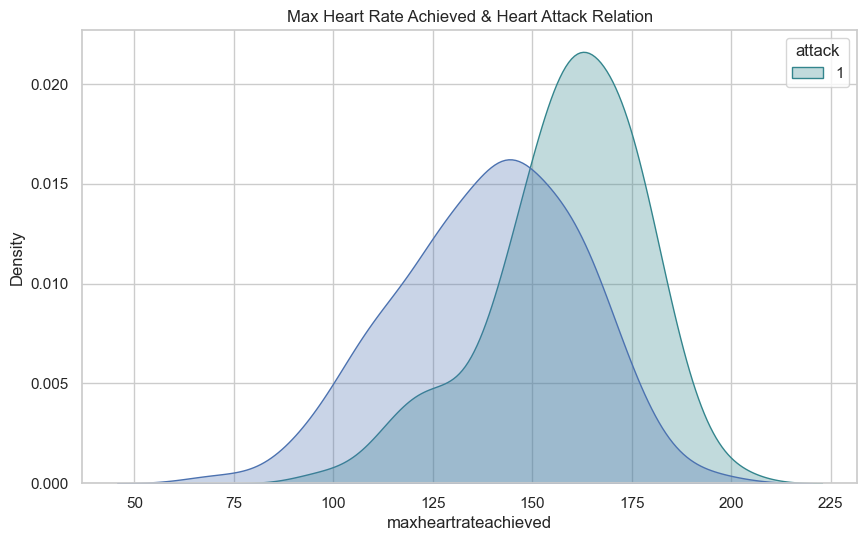

In [43]:
graphanalysis("Max Heart Rate Achieved & Heart Attack Relation","maxheartrateachieved","attack")

## Resting Blood Pressure V/s Probability of Heart Attack

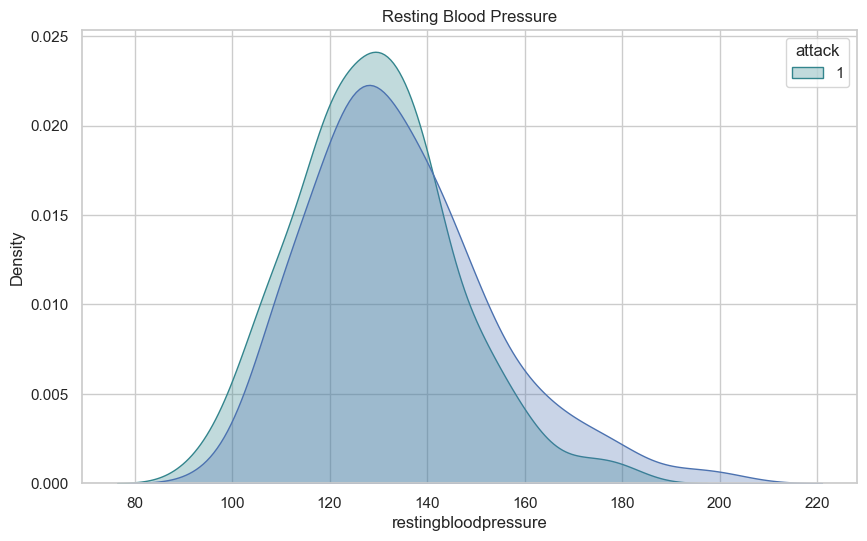

In [44]:
graphanalysis('Resting Blood Pressure','restingbloodpressure','attack')

## Cholestoral Level in Blood V/s Probability of Heart Attack

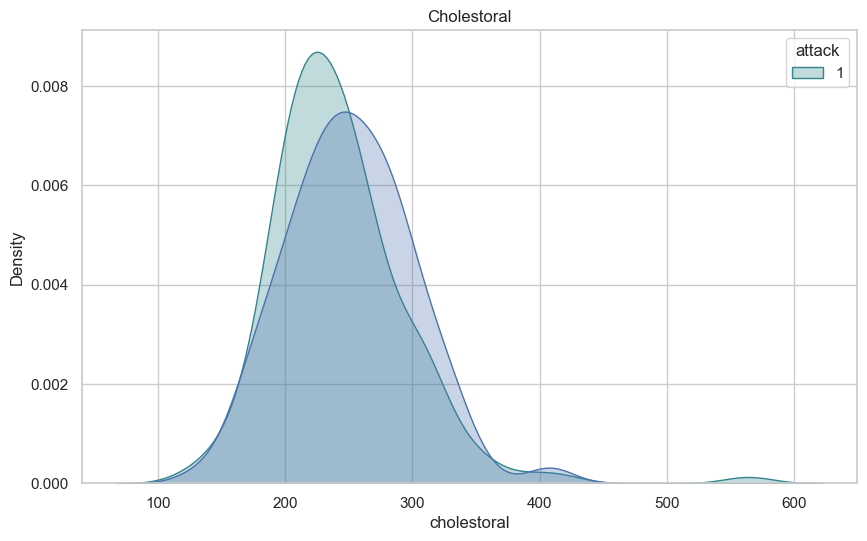

In [45]:
graphanalysis('Cholestoral','cholestoral','attack')

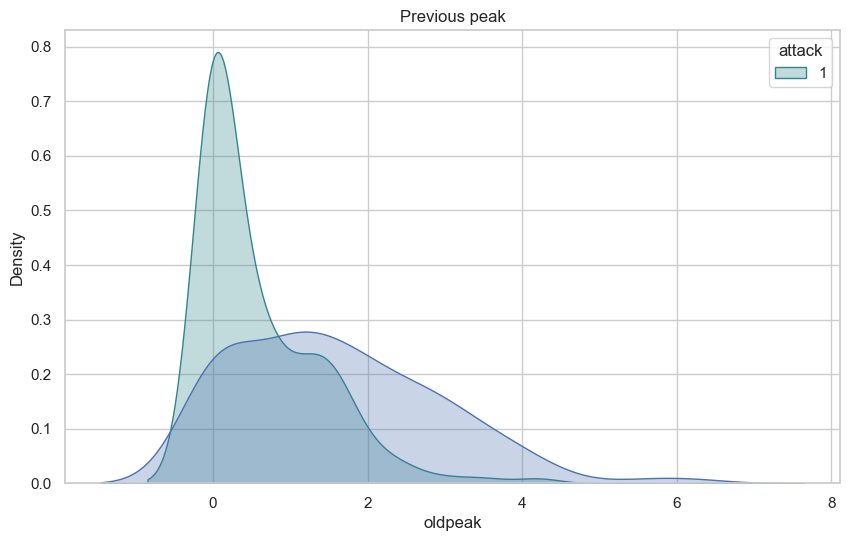

In [46]:
graphanalysis('Previous peak','oldpeak','attack')

## Analysis other Varriable Result in Heart Attack 

In [47]:
def graphshow(x,y,z):
    sns.countplot(data=ds_heart, x=y, hue=z)
    title=('{} Vs Attack Chances\n').format(x)
    plt.title(title)
    plt.xlabel(x)
    plt.show()

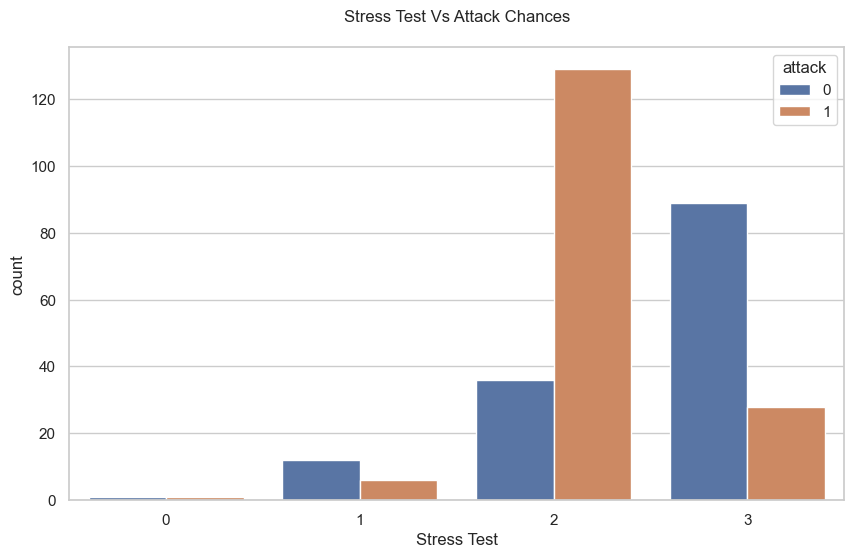

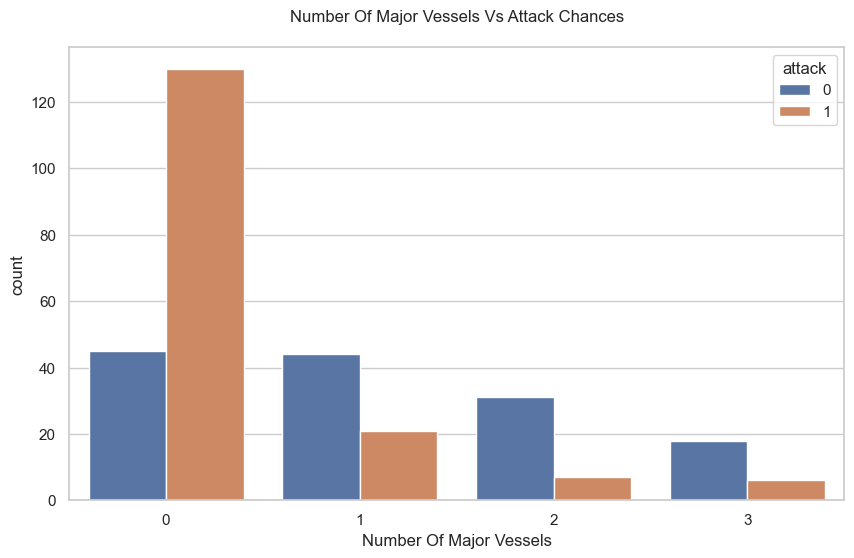

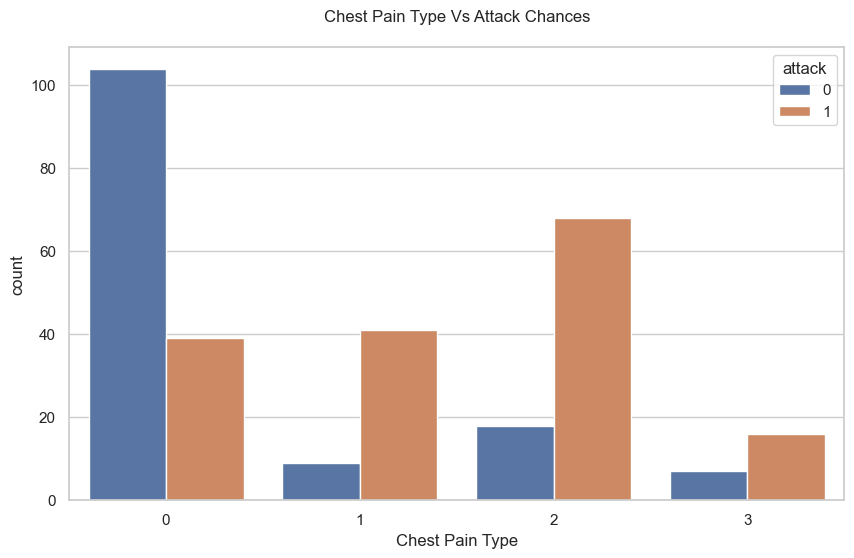

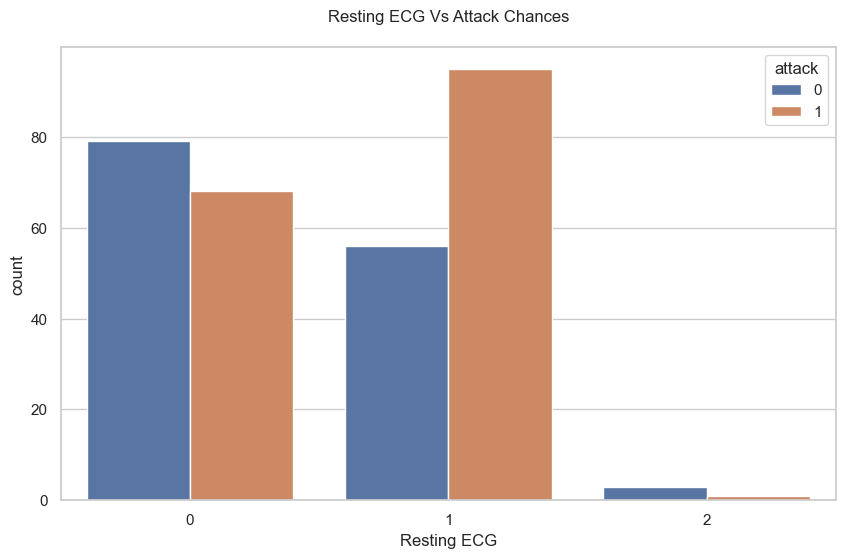

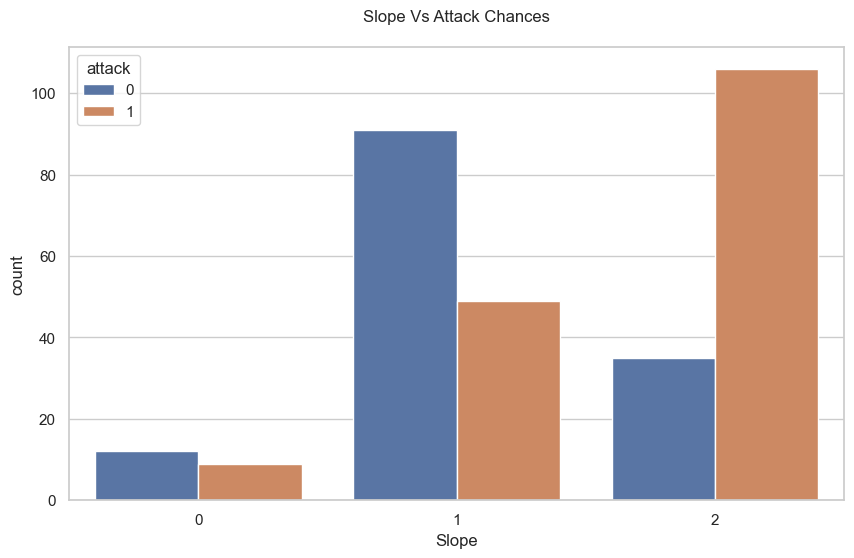

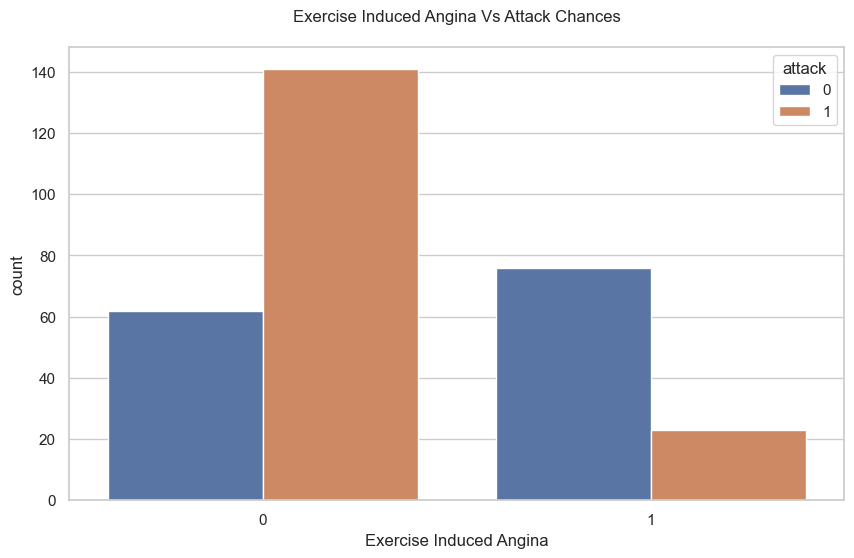

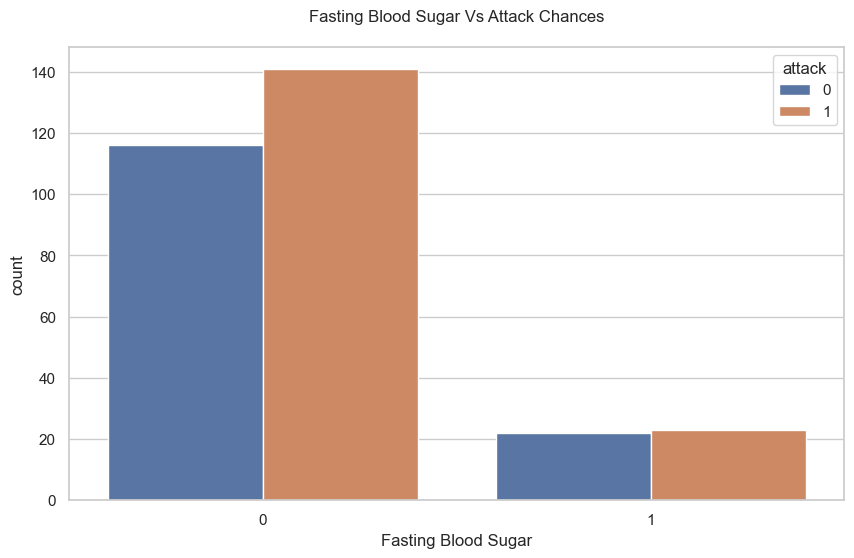

In [48]:
graphshow('Stress Test','stresstest','attack')
graphshow('Number Of Major Vessels','numberofmajorvessels','attack')
graphshow('Chest Pain Type','chestpaintype','attack')
graphshow('Resting ECG','restingecg','attack')
graphshow('Slope','slope','attack')
graphshow('Exercise Induced Angina','exerciseinducedangina','attack')
graphshow('Fasting Blood Sugar','fastingbloodsugar','attack')

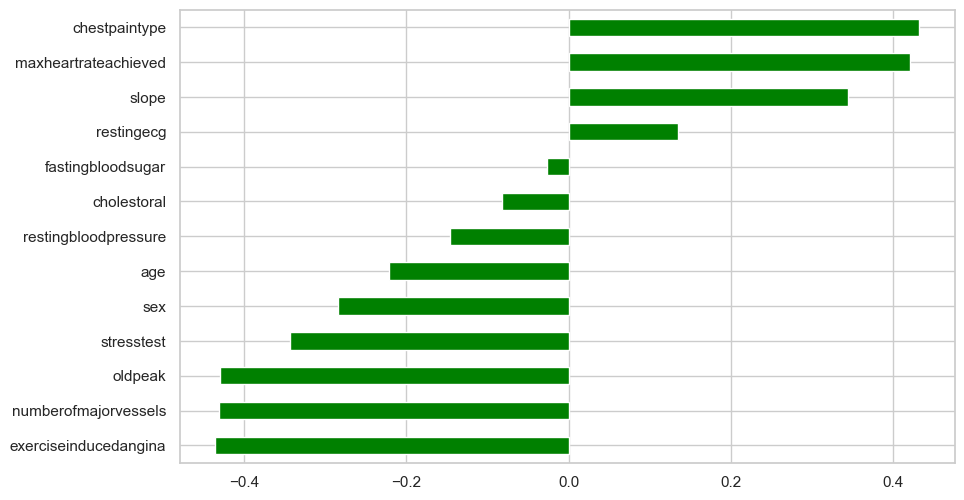

In [49]:
ds_heart.corr()['attack'].sort_values().drop('attack').plot(kind = 'barh', color="green");
# Correlation of the target column with other columns

### Modelling

In [50]:
# Split 75:25
x_train=ds_heart.drop(columns=["attack"])
y_train=ds_heart["attack"]
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.25)

In [51]:
print('Train dataset shape:',x_train.shape)
print('Test dataset shape', y_train.shape)

Train dataset shape: (226, 13)
Test dataset shape (226,)


In [52]:
numeric_columns = [column for column in x_train.columns if (ds_heart[column].dtype == 'float64' or ds_heart[column].dtype == 'int64')]
print(numeric_columns)
print('#'*99)
categorical_columns = x_train.select_dtypes(include='object').columns
print(categorical_columns)

['age', 'sex', 'chestpaintype', 'restingbloodpressure', 'cholestoral', 'fastingbloodsugar', 'restingecg', 'maxheartrateachieved', 'exerciseinducedangina', 'oldpeak', 'slope', 'numberofmajorvessels', 'stresstest']
###################################################################################################
Index([], dtype='object')


In [53]:
numeric_features = Pipeline([
    ('handlingmissingvalues',SimpleImputer(strategy='median')),
    ('scaling',StandardScaler(with_mean=True))
])
print(numeric_features)

Pipeline(steps=[('handlingmissingvalues', SimpleImputer(strategy='median')),
                ('scaling', StandardScaler())])


In [54]:
categorical_features = Pipeline([
    ('handlingmissingvalues',SimpleImputer(strategy='most_frequent')),
    ('encoding', OneHotEncoder()),
    ('scaling', StandardScaler(with_mean=False))
])
print(categorical_features)

Pipeline(steps=[('handlingmissingvalues',
                 SimpleImputer(strategy='most_frequent')),
                ('encoding', OneHotEncoder()),
                ('scaling', StandardScaler(with_mean=False))])


In [55]:
processing = ColumnTransformer([
                                ('numeric', numeric_features, numeric_columns),
                                ('categorical', categorical_features, categorical_columns)
                               ])
print(processing)

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('handlingmissingvalues',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaling',
                                                  StandardScaler())]),
                                 ['age', 'sex', 'chestpaintype',
                                  'restingbloodpressure', 'cholestoral',
                                  'fastingbloodsugar', 'restingecg',
                                  'maxheartrateachieved',
                                  'exerciseinducedangina', 'oldpeak', 'slope',
                                  'numberofmajorvessels', 'stresstest']),
                                ('categorical',
                                 Pipeline(steps=[('handlingmissingvalues',
                                                  SimpleImputer(strategy='most_frequent')),
                               

## Model Preparation & Model Evaluation

In [56]:
def prepare_model(algorithm):
    model = Pipeline(steps= [
                             ('processing',processing),
                             ('pca', TruncatedSVD(n_components=3, random_state=12)),
                             ('modeling', algorithm)
                            ])
    model.fit(x_train, y_train)
    return model

In [58]:
def prepare_confusion_matrix(algo, model):
    print(algo)
    plt.figure(figsize=(6,3))
    pred = model.predict(x_test)
    cm = confusion_matrix(y_test, pred)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax)
    plt.show()
    
    # labels, title and ticks
    ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels'); 
    ax.set_title('Confusion Matrix');

In [59]:
def prepare_classification_report(algo, model):
    print(algo+' Report :')
    pred = model.predict(x_test)
    print(classification_report(y_test, pred))

In [60]:
def prepare_roc_curve(algo, model):
    print(algo)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, thresholds = roc_curve(y_test,  y_pred_proba)
    roc_auc = auc(fpr, tpr)
    curve = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
    curve.plot()
    plt.show()

In [61]:
algorithms = [('Random Forest calssifier', RandomForestClassifier()), 
              ('Gradientboot classifier',GradientBoostingClassifier()),
              ('XGBClassifier', XGBClassifier())
             ]

In [64]:
trained_models = []
model_and_score = {}

for index, tup in enumerate(algorithms):
    model = prepare_model(tup[1])
    model_and_score[tup[0]] = str(model.score(x_train,y_train)*100)+"%"
    trained_models.append((tup[0],model))

## Evaluation Metrics

In [65]:
print(model_and_score)

{'Random Forest calssifier': '100.0%', 'Gradientboot classifier': '99.5575221238938%', 'XGBClassifier': '100.0%'}


Random Forest calssifier


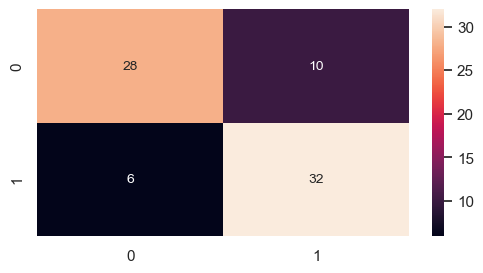

Gradientboot classifier


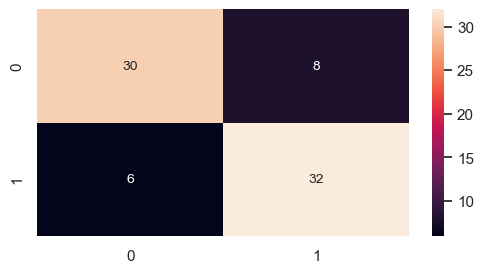

XGBClassifier


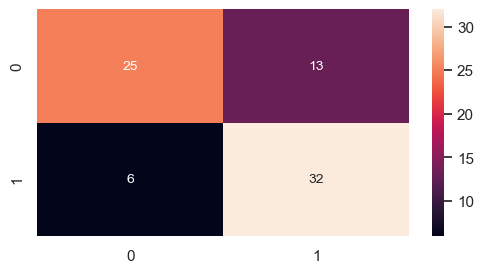

In [66]:
for index, tup in enumerate(trained_models):
    prepare_confusion_matrix(tup[0], tup[1])

In [67]:
for index, tup in enumerate(trained_models):
    prepare_classification_report(tup[0], tup[1])
    print("\n")

Random Forest calssifier Report :
              precision    recall  f1-score   support

           0       0.82      0.74      0.78        38
           1       0.76      0.84      0.80        38

    accuracy                           0.79        76
   macro avg       0.79      0.79      0.79        76
weighted avg       0.79      0.79      0.79        76



Gradientboot classifier Report :
              precision    recall  f1-score   support

           0       0.83      0.79      0.81        38
           1       0.80      0.84      0.82        38

    accuracy                           0.82        76
   macro avg       0.82      0.82      0.82        76
weighted avg       0.82      0.82      0.82        76



XGBClassifier Report :
              precision    recall  f1-score   support

           0       0.81      0.66      0.72        38
           1       0.71      0.84      0.77        38

    accuracy                           0.75        76
   macro avg       0.76      0.75 

In [68]:
print('Test dataset shape:',x_test.shape)
print('Tes dataset shape', y_test.shape)

Test dataset shape: (76, 13)
Tes dataset shape (76,)


Random Forest calssifier


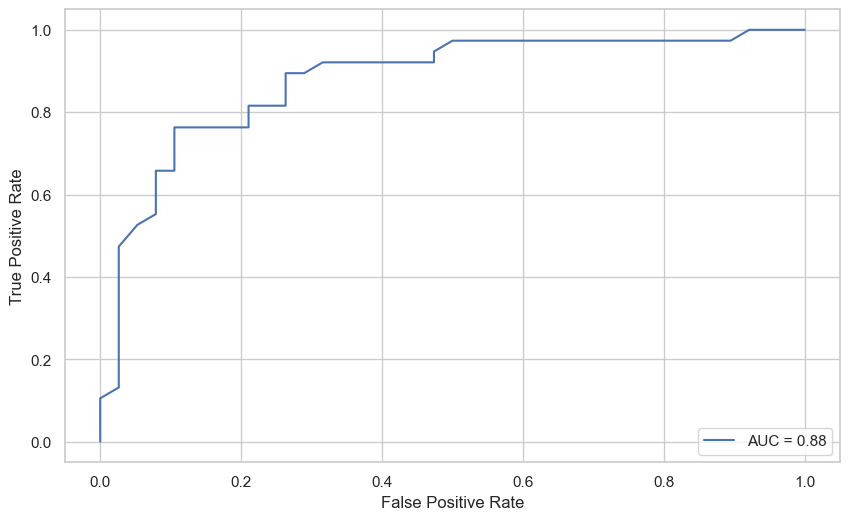

Gradientboot classifier


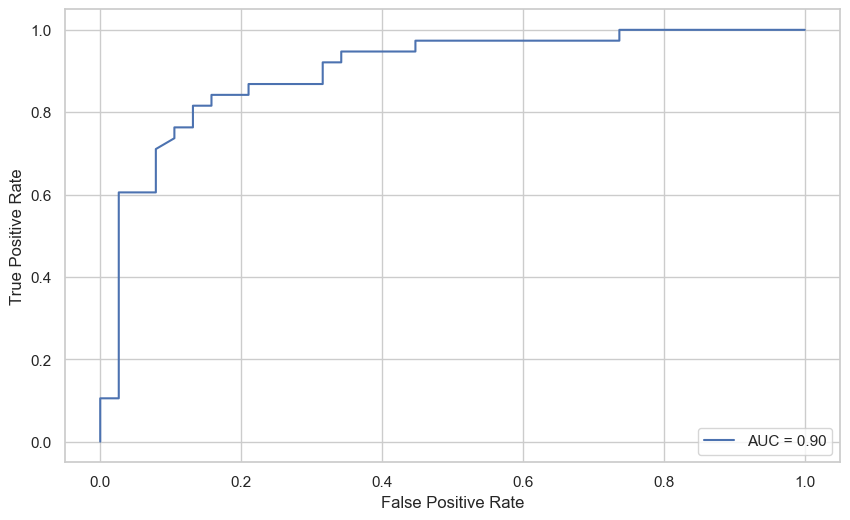

XGBClassifier


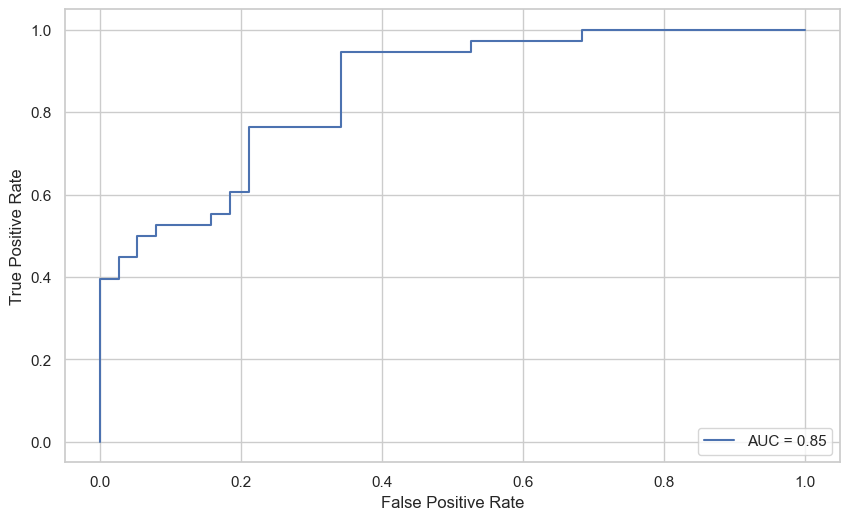

In [69]:
encoder = LabelEncoder()
y_test = encoder.fit_transform(y_test)

for index, tup in enumerate(trained_models):
    prepare_roc_curve(tup[0], tup[1])

In [70]:
x = pd.DataFrame([
    ["Random Forest calssifier","100","0.86"],
    ["Gradientboot classifier","99.56","0.86"],
    ["XGB Classifier","100","0.84"]],
    columns=["Model", "Train Accuracy", "AUC SCORE"]
)
print(x)

                      Model Train Accuracy AUC SCORE
0  Random Forest calssifier            100      0.86
1   Gradientboot classifier          99.56      0.86
2            XGB Classifier            100      0.84
